In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# One-dimensional vs. Multidimensional

## Held-out log-likelihoods

In [2]:
def cross_val_log_lik(fname):
    df = pd.read_csv(fname, index_col=0)
    return np.mean(np.array(df),axis=(0, 1))

In [3]:
for i in ['1d','md']:
    for j in ['h', 'a']:
        print(i, j)
        fname = "modeling_results/{}_other_{}_fb_CV.csv".format(i,j)
        print(cross_val_log_lik(fname))

1d h
-1.7778172874179334
1d a
-1.728105188177833
md h
-1.6322015896696225
md a
-1.6485640363772915


## Latent correlations

In [6]:
def get_corrs(df_corr):
    omegas = [['Omega.'+str(i)+"."+str(j) for j in range(1,5)] for i in range(1, 5)]
    corr = []
    for row in omegas:
        corr_row = []
        for col in row:
            corr_row.append(np.mean(df_corr[col]))
        corr.append(corr_row)
    return corr

In [7]:
def plot_corrs(corrs, labsx, labsy):
    _min = 1
    _max = 0
    for corr in corrs:
        if np.min(corr) < _min:
            _min = np.min(corr)
        if np.max(corr) >_max:
            _max = np.max(corr)
    for corr in corrs:
        fig, ax = plt.subplots(figsize=(7,7))
        sn.heatmap(corr, annot=True,xticklabels=labsx, yticklabels=labsy,
                   cmap='crest', cbar=False, vmin=_min, vmax=_max, ax=ax)
        plt.show()

In [8]:
sn.set(font_scale=1.9)

In [9]:
labsy = ['History of Art','Video Games','Cities','Math']
labsx = ['HA', 'VG', 'C', 'M']

In [10]:
human_md = pd.read_csv('modeling_results/md_other_h.csv', index_col=0)
human_corrs = get_corrs(human_md)

In [11]:
ai_md = pd.read_csv('modeling_results/md_other_a.csv', index_col=0)
ai_corrs = get_corrs(ai_md)

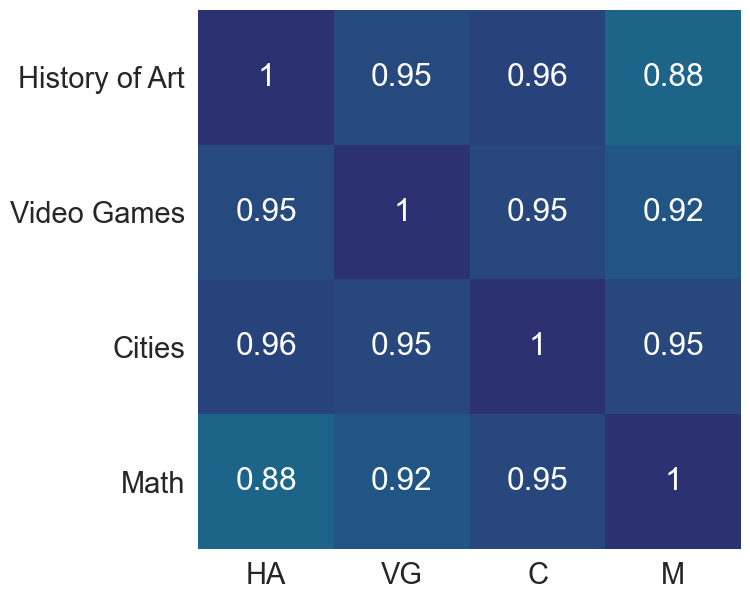

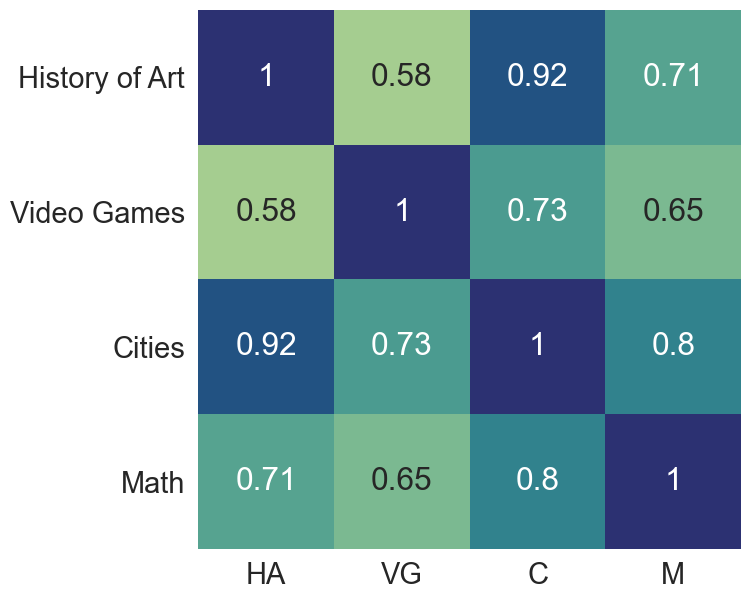

In [12]:
plot_corrs([ai_corrs,human_corrs], labsx, labsy)

# Undifferentiated vs. Differentiated by Ability vs. Fully Differentiated

## Held-out log-likelihoods

In [40]:
print("Human \t\t\t\t AI")
for diff_type in ['u','a','f']:
    s= {}
    for agent_type in ['h', 'a']:
        fname = "modeling_results/{}diff_{}_fb_CV.csv".format(diff_type,agent_type)
        s[agent_type] = cross_val_log_lik(fname)
    print(diff_type)
    print(s['h'], "\t\t", s['a'])

Human 				 AI
u
-2.696546861843219 		 -3.37315763713974
a
-2.0334928998672837 		 -2.1996250838430282
f
-2.190105717128376 		 -2.179834058836891


## Average WAIC and LOO scores

In [28]:
def compute_average_score(fname):
    with open(fname, "r") as f:
        waics, loos = f.readlines()
    waics = [float(x) for x in waics.strip().replace("[","").replace("]","").split(",")]
    loos = [float(x) for x in loos.strip().replace("[","").replace("]","").split(",")]
    return np.mean(waics).round(3), np.mean(loos).round(3)

In [34]:
print("(WAIC, LOO)")
print("Human \t\t\t\t AI")
for diff_type in ['u','a','f']:
    s= {}
    for agent_type in ['h','a']:
        fname = "modeling_results/{}diff_{}_metrics.csv".format(diff_type,agent_type)
        s[agent_type] = compute_average_score(fname)
    print(diff_type)
    print(s['h'], "\t\t", s['a'])

(WAIC, LOO)
Human 				 AI
u
(-42.527, -42.527) 		 (-67.856, -67.856)
a
(-29.413, -29.51) 		 (-30.103, -30.22)
f
(-29.892, -30.481) 		 (-28.233, -28.802)
